In [1]:
import pandas as pd # our main data management package
import matplotlib.pyplot as plt # our main display package
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from pathlib import Path
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from nltk.stem import PorterStemmer

In [2]:
my_dir_path = "train"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r") as file_open:
            results["file_name"].append(file.name)
            results["text"].append(file_open.read())
df_train = pd.DataFrame(results)

In [3]:
df_train.head(5)

,file_name,text
0,Harris_train_18.txt,Kamala Harris: Five million assault weapons ar...
1,Harris_train_24.txt,Kamala Harris: So what I am saying is that it ...
2,Harris_train_30.txt,Kamala Harris: Who has spent full time… Who ha...
3,Warren_train_42.txt,"Elizabeth Warren: So let’s be clear, whenever ..."
4,Warren_train_56.txt,Elizabeth Warren: This morning. I announced th...


In [4]:
my_dir_path = "test"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df_test = pd.DataFrame(results)

In [5]:
df_test.head(5)

,file_name,text
0,test_76.txt,I agree. Let me… She referenced me. I agreed w...
1,test_62.txt,"Well, a few months after I got elected, the la..."
2,test_111.txt,"Thank you. Probably Rand Paul. He and I, actua..."
3,test_89.txt,"So in my view, if fraud is involved, then that..."
4,test_105.txt,"So, first of all, Washington experience is not..."


In [6]:
print("We have",df_test.shape[0],"observations in the test dataframe")
print("We have",df_train.shape[0],"observations in the test dataframe")

We have 111 observations in the test dataframe
We have 528 observations in the test dataframe


In [7]:
df_train['file_name']

0         Harris_train_18.txt
1         Harris_train_24.txt
2         Harris_train_30.txt
3         Warren_train_42.txt
4         Warren_train_56.txt
                ...          
523    Klobuchar_train_44.txt
524       Warren_train_73.txt
525       Warren_train_67.txt
526       Harris_train_29.txt
527       Harris_train_15.txt
Name: file_name, Length: 528, dtype: object

In [8]:
labels = np.array(df_train['file_name'].str.split('_t').str[0])


In [9]:
labels
unique, counts = np.unique(labels, return_counts=True)

print(np.asarray((unique, counts)).T)

[['Biden' 60]
 ['Booker' 50]
 ['Buttigieg' 60]
 ['Castro' 23]
 ['Gabbard' 16]
 ['Harris' 40]
 ['Klobuchar' 55]
 ["O'Rourke" 33]
 ['Sanders' 60]
 ['Steyer' 19]
 ['Warren' 80]
 ['Yang' 32]]


In [10]:
df1 = df_train.copy()
df1 = df1['text'].str.split(':').str[0]
df1 = df1.str.split(n=1).str[1]
df1

0         Harris
1         Harris
2         Harris
3         Warren
4         Warren
         ...    
523    Klobuchar
524       Warren
525       Warren
526       Harris
527       Harris
Name: text, Length: 528, dtype: object

In [11]:
df2 = df_train.copy()
df2 = df_train['file_name'].str.split('_t').str[0]
df2

0         Harris
1         Harris
2         Harris
3         Warren
4         Warren
         ...    
523    Klobuchar
524       Warren
525       Warren
526       Harris
527       Harris
Name: file_name, Length: 528, dtype: object

In [12]:
df_outliers = pd.concat([df1,df2],axis=1, ignore_index=True)
symbols = ['text','filename']
df_outliers.columns = symbols
df_outliers

,text,filename
0,Harris,Harris
1,Harris,Harris
2,Harris,Harris
3,Warren,Warren
4,Warren,Warren
...,...,...
523,Klobuchar,Klobuchar
524,Warren,Warren
525,Warren,Warren
526,Harris,Harris


In [13]:
df_outliers['Compare'] = df_outliers['text'] == df_outliers['filename']


In [14]:
df_outliers.Compare.value_counts()

True    528
Name: Compare, dtype: int64

Hence we see that all the filenames and text for the training data match and they were no observations found that did not have matching names and text. No instances where the name of the file does not align
with the name at the start of the text is observed

In [15]:
df_train['file_name'] = df_train['file_name'].str.split('_t').str[1]


In [16]:
df_train['text'] = df_train['text'].str.split(':').str[1]

In [17]:
df_train['text'][1]

' So what I am saying is that it seems to me that you would be able to join me in saying the rule has to apply to Twitter, the same way, it does to Facebook.'

In [18]:
print(np.asarray((unique, counts)).T)

[['Biden' 60]
 ['Booker' 50]
 ['Buttigieg' 60]
 ['Castro' 23]
 ['Gabbard' 16]
 ['Harris' 40]
 ['Klobuchar' 55]
 ["O'Rourke" 33]
 ['Sanders' 60]
 ['Steyer' 19]
 ['Warren' 80]
 ['Yang' 32]]


From the distribution of the labels we can see that Warren has the maximum observations, followed by Biden and Buttigieg. The least number of observations were seen for Gabbard

In [19]:
# make all text lowercase
def text_lowercase(text):
    return text.lower()
# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
# remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text
# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text
#stem
porter_stemmer = PorterStemmer()
def stem(text):
    text = [porter_stemmer.stem(token) for token in text]
    return text


def preprocessing(text):
    text = text_lowercase(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = stem(text)
    text = ' '.join(text)
    return text

In [20]:
pp_text_train = [] # our preprocessed text column
for text_data in df_train['text']:
    pp_text_data = preprocessing(text_data)
    pp_text_train.append(pp_text_data)
df_train['pp_text'] = pp_text_train # add the preprocessed text as a column

In [21]:
df_train.head(5)


,file_name,text,pp_text
0,rain_18.txt,Five million assault weapons are on the stree...,five million assault weapon street america tod...
1,rain_24.txt,So what I am saying is that it seems to me th...,say seem would abl join say rule appli twitter...
2,rain_30.txt,Who has spent full time… Who has spent full t...,spent full time… spent full time critic peopl ...
3,rain_42.txt,"So let’s be clear, whenever someone hears the...",let ’ clear whenev someon hear term medicar wa...
4,rain_56.txt,This morning. I announced this morning that I...,morn announc morn ’ go take money big tech exe...


In [22]:
pp_text_test = [] # our preprocessed text column
for text_data in df_test['text']:
    pp_text_data = preprocessing(text_data)
    pp_text_test.append(pp_text_data)
df_test['pp_text'] = pp_text_test # add the preprocessed text as a column

In [23]:
df_test.head(5)


,file_name,text,pp_text
0,test_76.txt,I agree. Let me… She referenced me. I agreed w...,agre let me… referenc agre great job went floo...
1,test_62.txt,"Well, a few months after I got elected, the la...",well month got elect law firm got client clien...
2,test_111.txt,"Thank you. Probably Rand Paul. He and I, actua...",thank probabl rand paul actual invit join bill...
3,test_89.txt,"So in my view, if fraud is involved, then that...",view fraud involv ’ suitabl crimin statut hand...
4,test_105.txt,"So, first of all, Washington experience is not...",first washington experi experi matter ’ hundr ...


In [24]:
vec = CountVectorizer(ngram_range=(1,1))

In [25]:
train  = vec.fit(df_train['pp_text'])
counts = vec.transform(df_train['pp_text'])
counts.shape

(528, 3439)

In [26]:
count = vec.transform(df_test['pp_text'])
count.shape

(111, 3439)

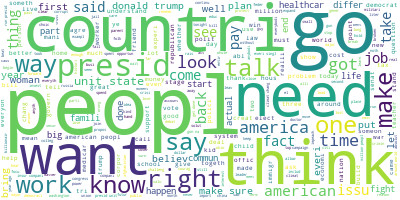

In [27]:
# Import the wordcloud library
from wordcloud import WordCloud
# Create a WordCloud object
long_string = ','.join(list(df_train['pp_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [28]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

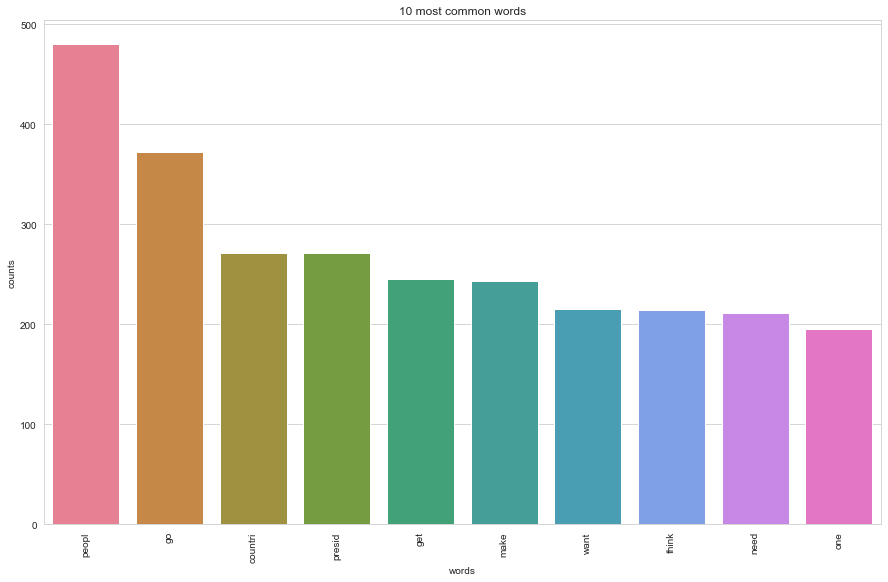

In [29]:
plot_10_most_common_words(counts,vec)

In [30]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 12 #As we have 12 speakers
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(counts)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda,vec, number_words)

Topics found via LDA:

Topic #0:
presid come call right teacher love one countri like think

Topic #1:
presid think get countri peopl talk back want one make

Topic #2:
peopl need go know talk make someth american plan wealth

Topic #3:
peopl go pay get talk like look want countri thing

Topic #4:
make peopl need go countri world american get work right

Topic #5:
think countri go peopl make america year tabl presid well

Topic #6:
presid elect got know think racism america first want year

Topic #7:
get countri peopl work need way presid go trump let

Topic #8:
peopl want go countri right woman american healthcar look win

Topic #9:
go peopl want presid american think right say work talk

Topic #10:
presid peopl go make right countri would get everi one

Topic #11:
peopl war chang one go need like countri everi say


We are using a word cloud, counting the frequency of words and top modelling using LDA to better understand who the speaker of each kind of data is. We performed LDA on 12 topics as we have 12 speakers. We can see from the results that each of the 12 topics are geared towards a distinct cause eg tax, war, education, woman bill etc..

In [31]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
p = pyLDAvis.sklearn.prepare(lda, counts, vec)

/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [32]:
pyLDAvis.save_html(p, 'ldaFearsInClassBiGrams.html')

In [33]:
# Parameter election
ngram_range = (1,1)
min_df = 1 #default
max_df = 1 #default
max_features = None #default

In [34]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(df_train).toarray()
labels_train = df_train
print(features_train.shape)

features_test = tfidf.transform(df_test).toarray()
labels_test = df_test
print(features_test.shape)

(3, 3)
(3, 3)


In [35]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train['pp_text'],labels, random_state=0)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [37]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, ngram_range=(1, 1), stop_words='english')
features = tfidf.fit_transform(df_train['text']).toarray()
print(labels.shape)
print(features.shape)

(528,)
(528, 4618)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df_train['pp_text'],labels, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [40]:
print(clf.predict(count_vect.transform(['giant corporation  billionair pay more, middl class famili pay less pocket  healthcar  finish talki about Eddi funnysomebody  health insuranc  dyin month  medical bills  insuranc company won’t cover. His wife Rachel is on phone for hours and hours and hours begging the insurance company, please cover what the doctors say he needs. He talks about what it’s like to go online with thousands of other people to beg friends, family, and strangers for money, so he can cover his medical expenses. The basic profit model of an insurance company is take in as much money as you can in premiums pay  little as possibl in healthcare coverage not working for America'])))

['Warren']


/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 16 members, which is too few. The minimum number of members in any class cannot be less than n_splits=80.
  % (min_groups, self.n_splits)), Warning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 16 members, which is too few. The minimum number of members in any class cannot be less than n_splits=80.
  % (min_groups, self.n_splits)), Warning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 16 members, which is too few. The minimum number of members in any class cannot be less than n_splits=80.
  % (min_groups, self.n_splits)), Warning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Fut

/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anacon

/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/miloni.desai/opt/anacon

/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anacon

/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anacon

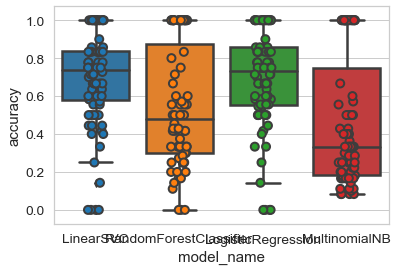

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

models = [
    LinearSVC(),
    RandomForestClassifier(n_estimators=400,criterion = "entropy", random_state=0),
    LogisticRegression(C = 99,penalty ='l2',random_state=0, dual = True),
    MultinomialNB()
]
CV = 80
cv_df = pd.DataFrame(index=range( CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [42]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.691587
LogisticRegression        0.689875
MultinomialNB             0.459865
RandomForestClassifier    0.539132
Name: accuracy, dtype: float64

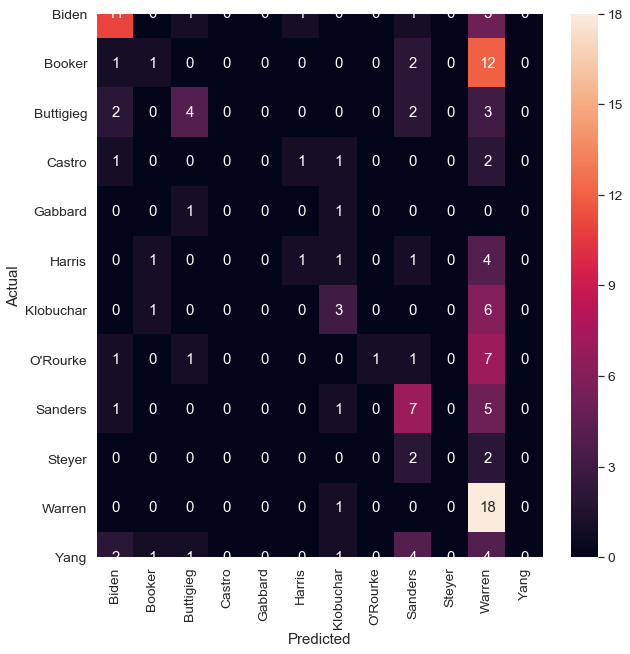

In [251]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(counts,labels, random_state = 0)
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state = 0)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt='d',
            xticklabels= np.asarray((unique)), yticklabels= np.asarray(unique))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


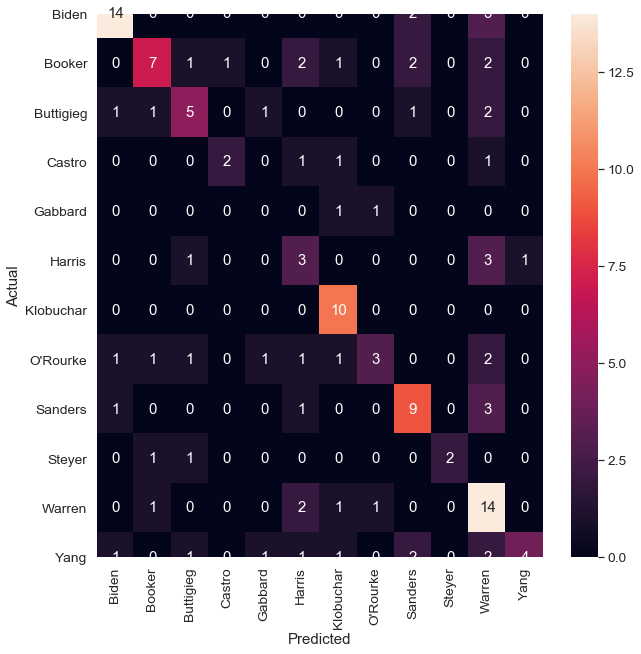

In [344]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(counts,labels, random_state = 0)
classifier=LogisticRegression(C = 99,penalty ='l2',random_state=0, dual = True)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt='d',
            xticklabels= np.asarray((unique)), yticklabels= np.asarray(unique))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

0.5454545454545454


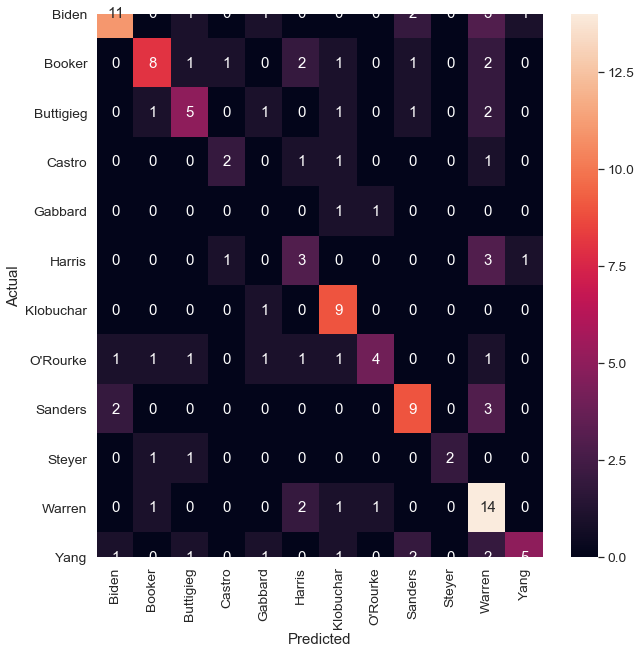

In [252]:
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(counts, labels, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
           xticklabels= np.asarray((unique)), yticklabels= np.asarray(unique))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
targets=model.predict(count)

In [253]:
targets #Labels for submission
targets = [x.upper() for x in targets]
targets = [''.join(c for c in s if c not in string.punctuation) for s in targets]
targets

['OROURKE',
 'OROURKE',
 'SANDERS',
 'OROURKE',
 'BUTTIGIEG',
 'GABBARD',
 'BIDEN',
 'OROURKE',
 'BIDEN',
 'WARREN',
 'WARREN',
 'WARREN',
 'HARRIS',
 'OROURKE',
 'WARREN',
 'SANDERS',
 'KLOBUCHAR',
 'STEYER',
 'CASTRO',
 'KLOBUCHAR',
 'SANDERS',
 'CASTRO',
 'BUTTIGIEG',
 'KLOBUCHAR',
 'STEYER',
 'BUTTIGIEG',
 'HARRIS',
 'BIDEN',
 'WARREN',
 'KLOBUCHAR',
 'HARRIS',
 'HARRIS',
 'BUTTIGIEG',
 'WARREN',
 'HARRIS',
 'WARREN',
 'BUTTIGIEG',
 'BUTTIGIEG',
 'BOOKER',
 'SANDERS',
 'HARRIS',
 'BOOKER',
 'YANG',
 'OROURKE',
 'WARREN',
 'SANDERS',
 'HARRIS',
 'SANDERS',
 'WARREN',
 'HARRIS',
 'WARREN',
 'BOOKER',
 'HARRIS',
 'SANDERS',
 'BIDEN',
 'BIDEN',
 'WARREN',
 'BIDEN',
 'BUTTIGIEG',
 'YANG',
 'GABBARD',
 'KLOBUCHAR',
 'HARRIS',
 'HARRIS',
 'HARRIS',
 'BOOKER',
 'WARREN',
 'HARRIS',
 'BUTTIGIEG',
 'WARREN',
 'STEYER',
 'SANDERS',
 'BUTTIGIEG',
 'BIDEN',
 'BOOKER',
 'BUTTIGIEG',
 'KLOBUCHAR',
 'WARREN',
 'HARRIS',
 'BUTTIGIEG',
 'SANDERS',
 'WARREN',
 'BIDEN',
 'WARREN',
 'BUTTIGIEG',
 'HARR

For semi supervised learning I have chosen the SVC model as it has a higher accuracy in our previous analysis. It takes lesser time to process and compute the predictions. It also provides minimal risk minimization. The logistic regression and random forest model have lower accuracies, more complex modelling and take longer to train. There is also too much hyperparameter tuning that is  required which further increases the complexity of these models over the SVC model

In [320]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import svm

def get_top_ten(df_train,df_test):
    m = svm.SVC(kernel='linear',probability=True)
    acc_1 = []
    X_train, X_test, y_train, y_test = train_test_split(counts,labels, random_state=0)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_1.append(acc)
    predict_p = m.predict_proba(count)
    order = np.argsort(predict_p, axis = 1)
    j = m.classes_[order[:,0]]
    all_probs = []
    for p in predict_p:
        prob = max(p)
        all_probs.append(prob)
    
    df_test['probs'] = all_probs
    df_test['speaker'] = j
    df_test.sort_values('probs',inplace = True)
    test1 = df_test.head(int(len(df_test)*(10/100)))
    test1 = test1[['text','speaker']]
    df_train = pd.concat([df_train,test1],sort = False)
    print("accuracy is : ",acc_1)
    print("probs is : ",predict_p)

    return df_train


In [321]:
train1  = get_top_ten(df_train,df_test)
train1.shape



accuracy is :  [0.4393939393939394]
probs is :  [[0.0957367  0.07210757 0.05790314 ... 0.01359578 0.15256864 0.02808014]
 [0.0406985  0.074828   0.07193003 ... 0.02543494 0.04611173 0.03758384]
 [0.02060355 0.1781682  0.08652636 ... 0.00756051 0.04193208 0.03532799]
 ...
 [0.08869216 0.08838321 0.10692901 ... 0.02736712 0.14077011 0.06982817]
 [0.05324658 0.15288417 0.14047006 ... 0.01050117 0.04303025 0.04322998]
 [0.0496292  0.04548876 0.16254799 ... 0.07305643 0.04761808 0.02819409]]


(539, 4)

In [322]:
train2 = get_top_ten(train1,df_test)
train2.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.09413136 0.07147968 0.05201772 ... 0.01411824 0.15441715 0.03076618]
 [0.03712782 0.06165331 0.05734336 ... 0.02257858 0.04687505 0.03619925]
 [0.02118888 0.1743021  0.07062263 ... 0.00764151 0.04628447 0.0349379 ]
 ...
 [0.08477954 0.08580561 0.10107399 ... 0.02747527 0.14198481 0.06975376]
 [0.05419314 0.13969476 0.09758272 ... 0.01038717 0.04500987 0.0396039 ]
 [0.0551677  0.03920062 0.19075811 ... 0.07095459 0.04502016 0.02972326]]


(550, 4)

In [323]:
train3 = get_top_ten(train2,df_test)
train3.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.09994463 0.07239783 0.05020738 ... 0.01311251 0.1460205  0.02827431]
 [0.03700602 0.06137193 0.05261789 ... 0.02093028 0.03867503 0.02957087]
 [0.02277504 0.18243356 0.07298404 ... 0.0069777  0.03937052 0.0319801 ]
 ...
 [0.08431411 0.08439298 0.1020119  ... 0.02621731 0.1333057  0.07029357]
 [0.0517487  0.14235517 0.10451574 ... 0.00957793 0.03698428 0.03801459]
 [0.07277638 0.03632433 0.18744609 ... 0.07417604 0.04495325 0.02628154]]


(561, 4)

In [324]:
train4 = get_top_ten(train3,df_test)
train4.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.1021149  0.07046106 0.05785845 ... 0.01500769 0.14020005 0.03172602]
 [0.04196537 0.05332561 0.06305398 ... 0.02521648 0.03645093 0.03416525]
 [0.02528714 0.18837    0.07417981 ... 0.00848562 0.04542729 0.03464052]
 ...
 [0.09210773 0.08288401 0.10152477 ... 0.02684583 0.13461845 0.06984304]
 [0.05892549 0.13287925 0.10134306 ... 0.01081754 0.04035038 0.03947772]
 [0.05611963 0.03655347 0.19974894 ... 0.09170876 0.04555337 0.03068571]]


(572, 4)

In [325]:
train5 = get_top_ten(train4,df_test)
train5.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.0997984  0.07046185 0.05568547 ... 0.013522   0.14939699 0.02745517]
 [0.03968571 0.05458304 0.06509671 ... 0.02319804 0.03923833 0.03162543]
 [0.02203718 0.17647111 0.08314919 ... 0.00766755 0.04283836 0.03092106]
 ...
 [0.08013118 0.08479428 0.10605402 ... 0.02495878 0.14240702 0.0696507 ]
 [0.04962888 0.12092405 0.12444391 ... 0.00961043 0.03716658 0.03165543]
 [0.06583909 0.04208033 0.18724929 ... 0.08005048 0.0461089  0.02204493]]


(583, 4)

In [326]:
train6 = get_top_ten(train5,df_test)
train6.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.09035008 0.06948318 0.05486478 ... 0.01729213 0.1442492  0.03316523]
 [0.03794881 0.04891084 0.06462264 ... 0.028706   0.04575216 0.03088004]
 [0.02118843 0.17511736 0.08968977 ... 0.01010496 0.04365224 0.03655377]
 ...
 [0.08427686 0.08469804 0.10357256 ... 0.0305965  0.13609811 0.06737997]
 [0.04985415 0.10766342 0.13097216 ... 0.01333174 0.04121951 0.03403435]
 [0.05449592 0.04681024 0.15368504 ... 0.06941168 0.04769598 0.03011069]]


(594, 4)

In [327]:
train7 = get_top_ten(train6,df_test)
train7.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.09575822 0.07617619 0.0476198  ... 0.01614126 0.14770561 0.03109099]
 [0.0457529  0.06906694 0.05310207 ... 0.02752325 0.04568763 0.03047397]
 [0.02574202 0.17725316 0.07535448 ... 0.00949096 0.04456299 0.03195855]
 ...
 [0.08476324 0.08873064 0.1078294  ... 0.02866414 0.13893653 0.06498311]
 [0.06323354 0.13709288 0.11979987 ... 0.01273697 0.04030344 0.03260339]
 [0.05614688 0.04819426 0.17357457 ... 0.07313074 0.05458945 0.03167037]]


(605, 4)

In [328]:
train8 = get_top_ten(train7,df_test)
train8.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.10433695 0.06883938 0.05582931 ... 0.01601857 0.14772254 0.02929344]
 [0.03846548 0.05631581 0.06510875 ... 0.02586095 0.04165463 0.03603832]
 [0.02060902 0.17927699 0.08043551 ... 0.00807455 0.04748442 0.03622993]
 ...
 [0.08723267 0.08404914 0.11055185 ... 0.02741754 0.13549166 0.07315812]
 [0.05285939 0.1481017  0.12304823 ... 0.01087997 0.04190386 0.04573587]
 [0.0440438  0.03605464 0.17522094 ... 0.07573855 0.04898776 0.02543957]]


(616, 4)

In [341]:
train9 = get_top_ten(train8,df_test)
train9.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.10178889 0.07628673 0.0540292  ... 0.01710692 0.14230017 0.03236489]
 [0.0468966  0.06315827 0.05948916 ... 0.02520435 0.03793999 0.03223651]
 [0.02476624 0.19451016 0.07094378 ... 0.00960454 0.04099022 0.03195497]
 ...
 [0.08630801 0.08869953 0.10454173 ... 0.02952943 0.13243262 0.06501652]
 [0.06768041 0.1561599  0.11493049 ... 0.01379434 0.03867082 0.03657369]
 [0.0548796  0.0373758  0.16887768 ... 0.08524643 0.05706146 0.02436692]]


(627, 4)

In [343]:
train10 = get_top_ten(train9,df_test)
train10 = train10.dropna(subset = ['speaker'])
train10 = train10.drop('pp_text', axis=1) 
train10.shape

accuracy is :  [0.4393939393939394]
probs is :  [[0.10548878 0.07288127 0.05374263 ... 0.01558355 0.14326224 0.03107848]
 [0.03574165 0.06125187 0.05650032 ... 0.02425363 0.0457353  0.03061844]
 [0.02211532 0.17269193 0.07571325 ... 0.00828424 0.05011631 0.03298832]
 ...
 [0.08973699 0.08444983 0.10873276 ... 0.02645211 0.14073201 0.06981242]
 [0.04548703 0.13888328 0.09711627 ... 0.01085249 0.0476514  0.03471998]
 [0.06047742 0.04213594 0.22789333 ... 0.07061392 0.05583615 0.02374712]]


(110, 3)

As we can see the accuracy has not changed much after adding the test samples. Our previous accuracy for both training and testing was higher. There are some NaN values present in this analysis which could account for the low accuracy of less than 50%. Thus we will prefer the SVC model trained on training data using supervised learning than this model.

In [333]:
targets_semi = train10['speaker']

In [334]:
targets_semi = [x.upper() for x in targets_semi]
targets_semi = [''.join(c for c in s if c not in string.punctuation) for s in targets_semi]
targets_semi

['STEYER',
 'SANDERS',
 'STEYER',
 'STEYER',
 'STEYER',
 'YANG',
 'CASTRO',
 'OROURKE',
 'STEYER',
 'GABBARD',
 'GABBARD',
 'STEYER',
 'STEYER',
 'SANDERS',
 'STEYER',
 'GABBARD',
 'YANG',
 'STEYER',
 'CASTRO',
 'STEYER',
 'GABBARD',
 'STEYER',
 'STEYER',
 'STEYER',
 'CASTRO',
 'SANDERS',
 'STEYER',
 'YANG',
 'STEYER',
 'GABBARD',
 'STEYER',
 'GABBARD',
 'GABBARD',
 'STEYER',
 'STEYER',
 'STEYER',
 'CASTRO',
 'SANDERS',
 'YANG',
 'STEYER',
 'GABBARD',
 'GABBARD',
 'OROURKE',
 'CASTRO',
 'STEYER',
 'STEYER',
 'SANDERS',
 'STEYER',
 'STEYER',
 'YANG',
 'CASTRO',
 'GABBARD',
 'OROURKE',
 'STEYER',
 'GABBARD',
 'STEYER',
 'STEYER',
 'SANDERS',
 'STEYER',
 'CASTRO',
 'BIDEN',
 'STEYER',
 'YANG',
 'GABBARD',
 'GABBARD',
 'OROURKE',
 'STEYER',
 'STEYER',
 'SANDERS',
 'STEYER',
 'STEYER',
 'CASTRO',
 'YANG',
 'GABBARD',
 'STEYER',
 'OROURKE',
 'GABBARD',
 'STEYER',
 'STEYER',
 'SANDERS',
 'STEYER',
 'CASTRO',
 'BIDEN',
 'YANG',
 'GABBARD',
 'OROURKE',
 'GABBARD',
 'STEYER',
 'STEYER',
 'STEYER

In [335]:
file_name = df_test['file_name']

In [338]:
import pandas as pd
columns = {}

columns['FILE'] = file_name
columns['MODEL1'] = targets
columns['MODEL2'] = targets_semi

data = list(zip(columns['FILE'],columns['MODEL1'],columns['MODEL2']))

df = pd.DataFrame(data = data)

df.to_csv('date_update.csv', index=False, header=False)

For Q14, I did not plot a graph as my accuracy remains nearly the same for all iterations.